In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

In [30]:
TICKER = 'AAPL'  # Change to any stock: 'GOOGL', 'MSFT', 'TSLA', etc.
START_DATE = '2022-01-01'
END_DATE = datetime.now().strftime('%Y-%m-%d')

print(f"\n📊 Downloading {TICKER} data from {START_DATE} to {END_DATE}...")

# Download data
stock_data = yf.download(TICKER, start=START_DATE, end=END_DATE, progress=False)

print(f"✅ Downloaded {len(stock_data)} days of data!")

# Clean the data before saving
stock_data_clean = stock_data.copy()

# If multi-level columns, flatten them
if isinstance(stock_data_clean.columns, pd.MultiIndex):
    stock_data_clean.columns = stock_data_clean.columns.get_level_values(0)

# Reset index to make Date a column, then save
stock_data_clean.reset_index().to_csv(f'../data/{TICKER}_stock_data.csv', index=False)
print(f"💾 Saved to ../data/{TICKER}_stock_data.csv")


📊 Downloading AAPL data from 2022-01-01 to 2026-01-13...
✅ Downloaded 1010 days of data!
💾 Saved to ../data/AAPL_stock_data.csv


In [19]:
print("\n" + "="*60)
print("EXPLORING THE DATA")
print("="*60)

# Show first few rows
print("\n📋 First 5 rows:")
print(stock_data.head())

# Show data info
print(f"\n📊 Dataset Info:")
print(f"   Rows (days): {len(stock_data)}")
print(f"   Columns: {len(stock_data.columns)}")
print(f"\n   Column Names:")
for col in stock_data.columns:
    print(f"   - {col}")

# Check for missing values
missing = stock_data.isnull().sum().sum()
print(f"\n🔍 Missing values: {missing}")


EXPLORING THE DATA

📋 First 5 rows:
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.270325  179.122459  174.058687  174.176216  104487900
2022-01-04  176.007782  179.181217  175.439697  178.877588   99310400
2022-01-05  171.326019  176.468151  171.051773  175.919659   94537600
2022-01-06  168.465958  171.698156  168.113354  169.151572   96904000
2022-01-07  168.632507  170.562032  167.515931  169.337715   86709100

📊 Dataset Info:
   Rows (days): 1010
   Columns: 5

   Column Names:
   - ('Close', 'AAPL')
   - ('High', 'AAPL')
   - ('Low', 'AAPL')
   - ('Open', 'AAPL')
   - ('Volume', 'AAPL')

🔍 Missing values: 0


In [20]:
print("\n" + "="*60)
print("BASIC STATISTICS")
print("="*60)

print("\n📊 Summary Statistics:")
print(stock_data.describe().round(2))

# Calculate price statistics
min_price = float(stock_data['Close'].min())
max_price = float(stock_data['Close'].max())
avg_price = float(stock_data['Close'].mean())
current_price = float(stock_data['Close'].iloc[-1])

print(f"\n💰 Price Information:")
print(f"   Current Price: ${current_price:.2f}")
print(f"   Average Price: ${avg_price:.2f}")
print(f"   Lowest Price: ${min_price:.2f}")
print(f"   Highest Price: ${max_price:.2f}")


BASIC STATISTICS

📊 Summary Statistics:
Price     Close     High      Low     Open        Volume
Ticker     AAPL     AAPL     AAPL     AAPL          AAPL
count   1010.00  1010.00  1010.00  1010.00  1.010000e+03
mean     190.55   192.44   188.49   190.37  6.448120e+07
std       37.88    38.04    37.69    37.88  2.779048e+07
min      123.16   125.87   122.32   124.14  1.791060e+07
25%      162.48   163.59   160.45   162.13  4.603602e+07
50%      183.66   185.17   181.86   183.58  5.623525e+07
75%      221.51   224.09   219.12   220.84  7.626522e+07
max      286.19   288.62   283.30   286.20  3.186799e+08

💰 Price Information:
   Current Price: $260.25
   Average Price: $190.55
   Lowest Price: $123.16
   Highest Price: $286.19


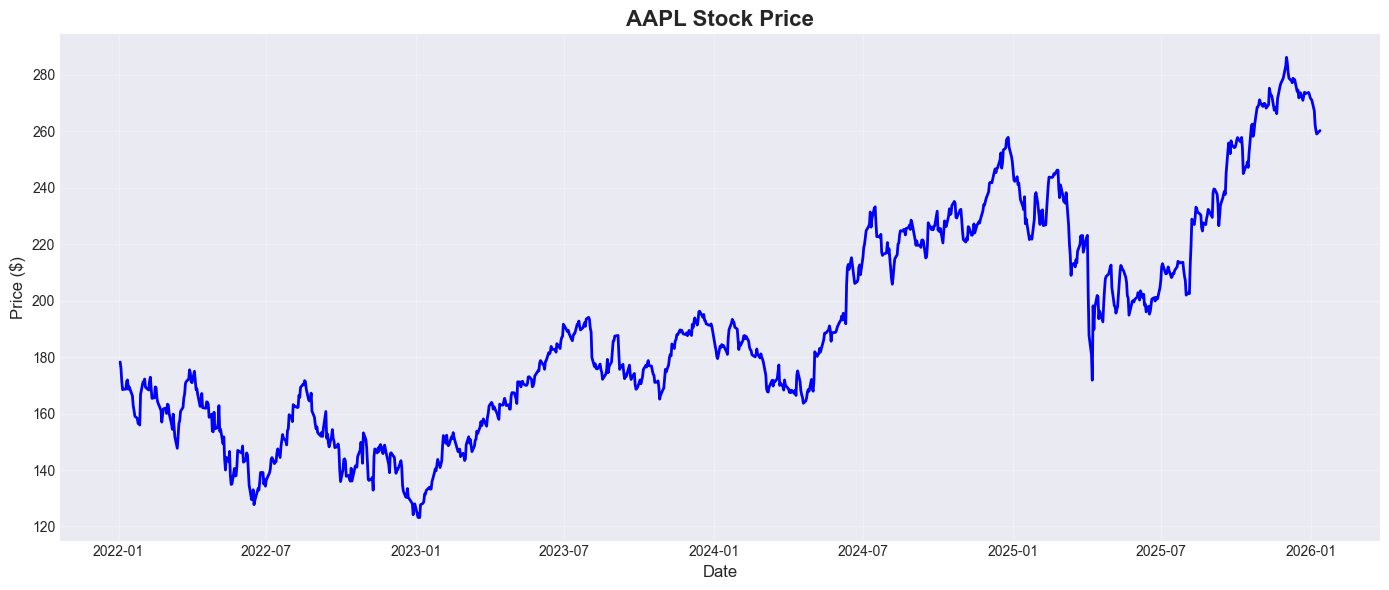

✅ Price chart created!


In [22]:
plt.figure(figsize=(14, 6))
plt.plot(stock_data.index, stock_data['Close'], linewidth=2, color='blue')
plt.title(f'{TICKER} Stock Price', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'../data/{TICKER}_price_volume.png', dpi=300)
plt.show()

print("✅ Price chart created!")


CALCULATING MOVING AVERAGES
✅ Calculated 7-day and 30-day moving averages


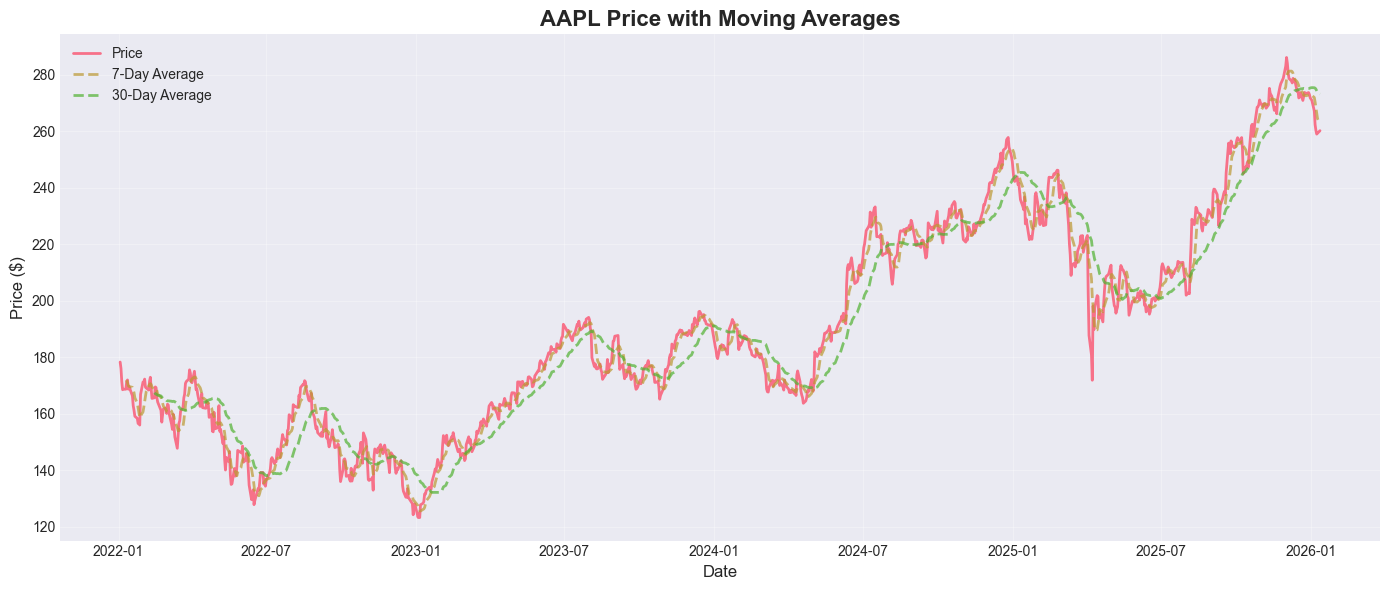

✅ Moving averages chart created!


In [23]:
print("\n" + "="*60)
print("CALCULATING MOVING AVERAGES")
print("="*60)

# Calculate moving averages (smoothed trends)
stock_data['MA_7'] = stock_data['Close'].rolling(window=7).mean()
stock_data['MA_30'] = stock_data['Close'].rolling(window=30).mean()

print("✅ Calculated 7-day and 30-day moving averages")

# Plot with moving averages
plt.figure(figsize=(14, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Price', linewidth=2)
plt.plot(stock_data.index, stock_data['MA_7'], label='7-Day Average',
         linewidth=2, linestyle='--', alpha=0.7)
plt.plot(stock_data.index, stock_data['MA_30'], label='30-Day Average',
         linewidth=2, linestyle='--', alpha=0.7)
plt.title(f'{TICKER} Price with Moving Averages', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'../data/{TICKER}_moving_averages.png', dpi=300)
plt.show()

print("✅ Moving averages chart created!")


ANALYZING DAILY CHANGES

📈 Daily Change Statistics:
   Average Daily Change: 0.05%
   Biggest Gain: 15.33%
   Biggest Loss: -9.25%


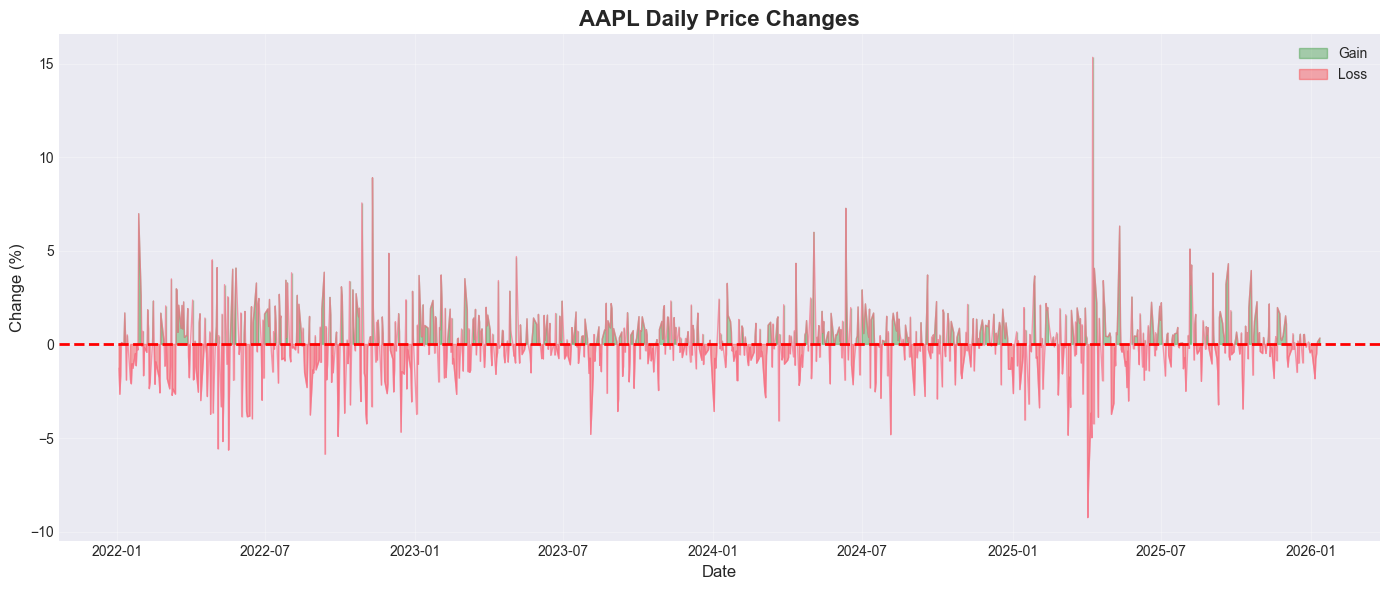

In [24]:
print("\n" + "="*60)
print("ANALYZING DAILY CHANGES")
print("="*60)

# Calculate daily percentage change
stock_data['Daily_Change'] = stock_data['Close'].pct_change() * 100

avg_change = float(stock_data['Daily_Change'].mean())
max_gain = float(stock_data['Daily_Change'].max())
max_loss = float(stock_data['Daily_Change'].min())

print(f"\n📈 Daily Change Statistics:")
print(f"   Average Daily Change: {avg_change:.2f}%")
print(f"   Biggest Gain: {max_gain:.2f}%")
print(f"   Biggest Loss: {max_loss:.2f}%")

# Plot daily changes
plt.figure(figsize=(14, 6))
plt.plot(stock_data.index, stock_data['Daily_Change'], linewidth=1, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.fill_between(stock_data.index, stock_data['Daily_Change'], 0,
                 where=(stock_data['Daily_Change'] > 0), alpha=0.3,
                 color='green', label='Gain')
plt.fill_between(stock_data.index, stock_data['Daily_Change'], 0,
                 where=(stock_data['Daily_Change'] <= 0), alpha=0.3,
                 color='red', label='Loss')
plt.title(f'{TICKER} Daily Price Changes', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Change (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'../data/{TICKER}_daily_changes.png', dpi=300)
plt.show()

In [25]:
print("\n" + "="*60)
print("SAVING DATA")
print("="*60)

# Save processed data for Phase 2
output_file = f'../data/{TICKER}_processed_phase1.csv'
stock_data.to_csv(output_file)

print(f"💾 Saved to: {output_file}")


SAVING DATA
💾 Saved to: ../data/AAPL_processed_phase1.csv


In [26]:
print("\n" + "="*60)
print("PHASE 1 COMPLETE!")
print("="*60)

print(f"""
✅ Summary:
   - Downloaded {len(stock_data)} days of {TICKER} data
   - Current price: ${current_price:.2f}
   - Price range: ${min_price:.2f} - ${max_price:.2f}
   - Average daily change: {avg_change:.2f}%

Files created:
   - {TICKER}_stock_data.csv
   - {TICKER}_processed_phase1.csv
   - 3 chart images

print("="*60)


PHASE 1 COMPLETE!

✅ Summary:
   - Downloaded 1010 days of AAPL data
   - Current price: $260.25
   - Price range: $123.16 - $286.19
   - Average daily change: 0.05%

📁 Files created:
   - AAPL_stock_data.csv
   - AAPL_processed_phase1.csv
   - 4 chart images

🎯 Next: Phase 2 - Feature Engineering

